## Linear Regression Analysis of Californian Housing Price Determinants using Python

![alt text](california_house_prices.jpg "Title")
<div style="text-align: justify">
The California housing market presents a complex landscape for both buyers and sellers. Accurately identifying the features that statistically influence house prices is crucial for informed decision-making.

This project uses machine learning, specifically linear regression, to perform a causal analysis. The goal is to identify the key features that have a statistically significant impact on Californian house prices.

By understanding these causal relationships, it can equip the following market participants with actionable insights:

**Buyers**: Gain valuable insights to prioritize features that matter most for their search, optimizing their purchase decisions.

**Sellers**: Identify features that can be strategically highlighted in listings to attract buyers and potentially achieve faster sales at a more competitive price.

This project contributes to a more transparent and data-driven understanding of the California housing market, benefiting both buyers and sellers.

Image © Wärtsilä
</div>

### About the Dataset
<div style="text-align: justify">

**Context**

This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

**Content**

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The data aren't cleaned so there are some preprocessing steps required. The columns are as follows, and their names are self explanatory:

- Independent Variable
    - longitude
    - latitude
    - housing_median_age
    - total_rooms
    - total_bedrooms
    - population
    - households
    - median_income
    - ocean_proximity

- Dependent Variable
    - median_house_value

</div>

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [310]:
housing_data = pd.read_csv("C:/Users/Renz/Documents/GitHub/Linear Regression Analysis of Californian Housing Price Determinants using Python/housing.csv")
housing_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [311]:
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [312]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [313]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

### Missing Data Analysis

In [314]:
# Checking missing values
missing_values = housing_data.isnull().sum()

# Calculating the percentage of missing data per column
missing_values_percentage = (missing_values / len(housing_data)) * 100

print('Missing values in each column:\n', missing_values)
print('\nPercentage of missing values:\n', missing_values_percentage)

Missing values in each column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Percentage of missing values:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [315]:
# Removing rows with missing values
housing_data_cleaned = housing_data.dropna()

print(housing_data_cleaned.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


### Exploratory Data Analysis

In [316]:
housing_data_cleaned.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


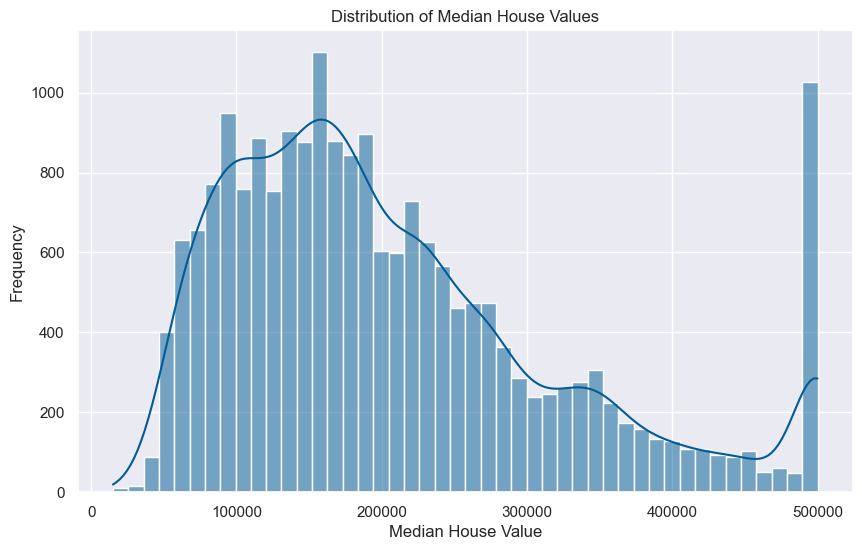

In [317]:
# Visualizing the target variable

sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))
sns.histplot(housing_data_cleaned['median_house_value'], color='#005b96', kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

### Removing Outliers Using Interquartile Range

In [318]:
Q1 = housing_data_cleaned['median_house_value'].quantile(0.25)
Q3 = housing_data_cleaned['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

# Defining the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
housing_data_no_outliers_1 = housing_data_cleaned[(housing_data_cleaned['median_house_value'] >= lower_bound) & (housing_data_cleaned['median_house_value'] <= upper_bound)]

# Checking the shape of data before and after outlier removal
print('Original data shape: ', housing_data_cleaned.shape)
print('Data shape without outliers: ', housing_data_no_outliers_1.shape)

Original data shape:  (20433, 10)
Data shape without outliers:  (19369, 10)


### Detecting Outliers Using Box and Whisker Plot

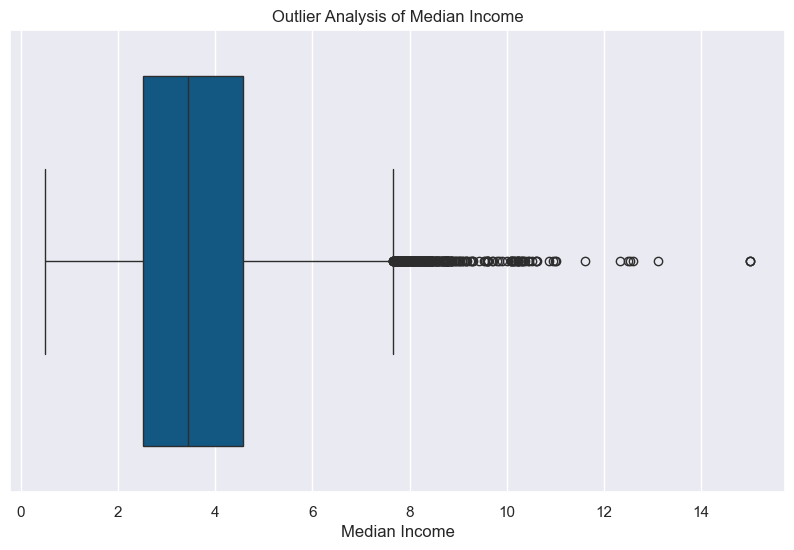

In [319]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=housing_data_no_outliers_1['median_income'], color='#005b96')
plt.title('Outlier Analysis of Median Income')
plt.xlabel('Median Income')
plt.show()

In [320]:
Q1_income = housing_data_no_outliers_1['median_income'].quantile(0.25)
Q3_income = housing_data_no_outliers_1['median_income'].quantile(0.75)
IQR_income = Q3_income - Q1_income

# Defining the bounds for outliers
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

# Removing outliers
above_lower_bound = housing_data_no_outliers_1['median_income'] >= lower_bound_income
above_upper_bound = housing_data_no_outliers_1['median_income'] <= upper_bound_income
housing_data_no_outliers_2 = housing_data_no_outliers_1[(above_lower_bound) & (above_upper_bound)]

# Checking the shape of data before and after outlier removal
print('Original data shape: ', housing_data_no_outliers_1.shape)
print('Data shape without outliers: ', housing_data_no_outliers_2.shape)

Original data shape:  (19369, 10)
Data shape without outliers:  (19026, 10)


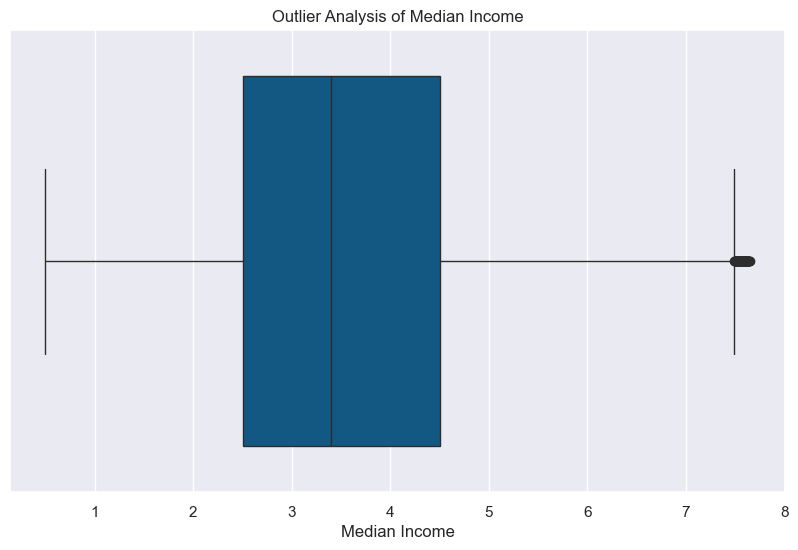

In [321]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=housing_data_no_outliers_2['median_income'], color='#005b96')
plt.title('Outlier Analysis of Median Income')
plt.xlabel('Median Income')
plt.show()

In [322]:
data = housing_data_no_outliers_2

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

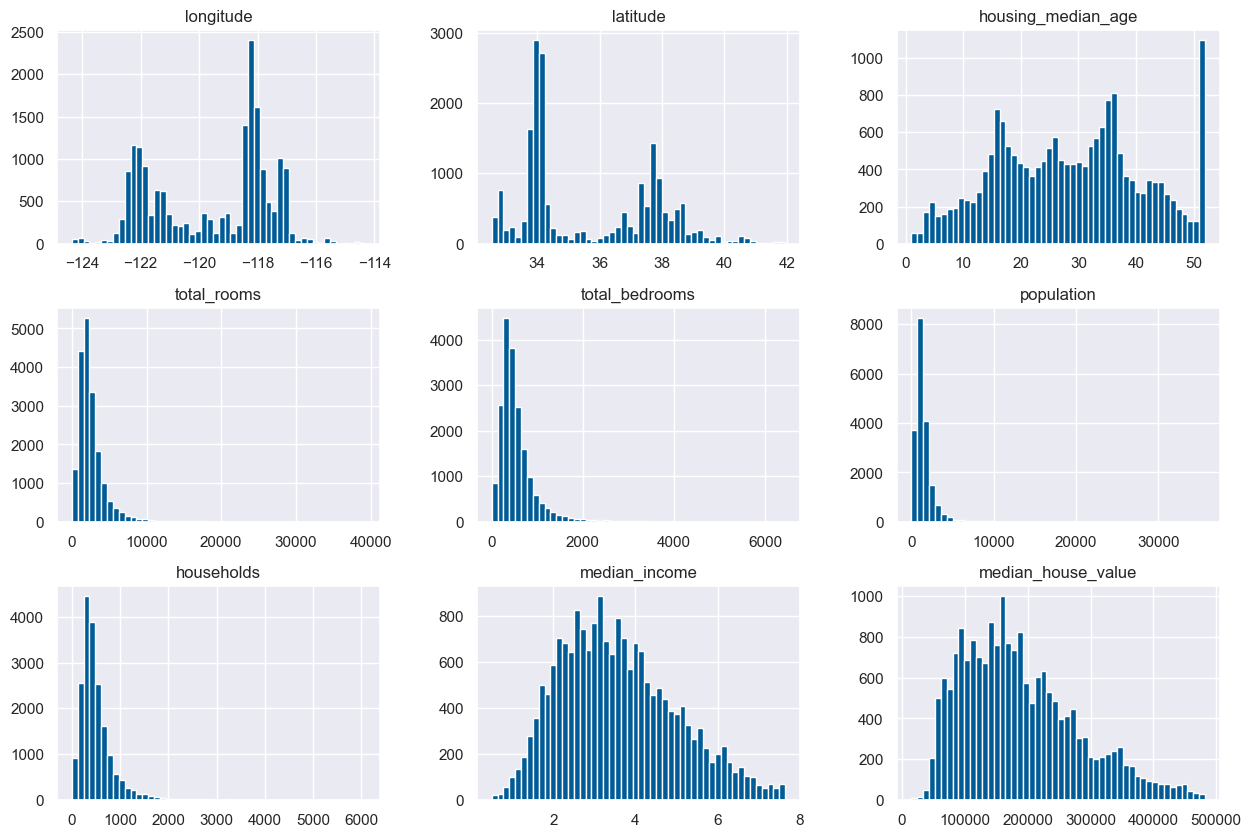

In [323]:
data.hist(bins=50, figsize=(15, 10), color='#005b96')

In [324]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [325]:
import plotly.express as px

fig = px.scatter_mapbox(data, lat='latitude',
                           lon='longitude',
                           hover_name='ocean_proximity',
                           color='median_house_value',
                           size='population',
                           zoom=5.8,
                           height=750)

fig.update_layout(mapbox_style='open-street-map',
                  coloraxis_colorbar=dict(title='Median House Value'),
                  title='Scatter Map of Median House Values')

fig.show()

### Correleration Heatmap

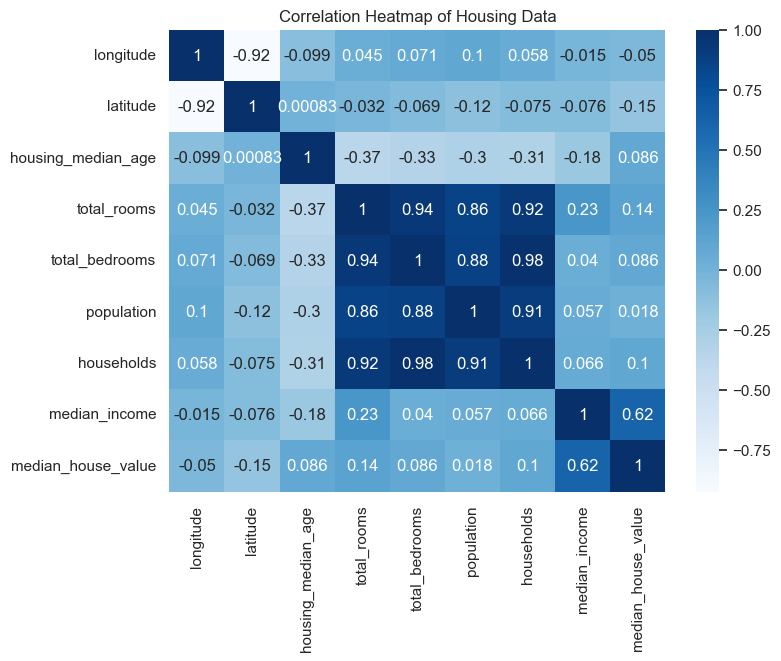

In [326]:
# Dropping the ocean_proximity column from the correlation calculation
data_corr = data.drop('ocean_proximity', axis=1).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(data_corr, annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Housing Data')
plt.show()

In [327]:
data = data.drop('total_bedrooms', axis=1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

### Categorizing String Data with Dummy Variables

In [328]:
# Counting unique values of the categorical column
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [329]:
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity')
data = pd.concat([data.drop('ocean_proximity', axis=1), ocean_proximity_dummies], axis=1)
data.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,False,False,False,True,False
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,False,False,False,True,False


In [330]:
# Dropping ocean_proximity_ISLAND column to satisfy the OLS assumption that there should be no perfect multicollinearity (as it causes large OLS estimator variance)
data = data.drop('ocean_proximity_ISLAND', axis=1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [331]:
print(data.dtypes)

longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
ocean_proximity_<1H OCEAN        bool
ocean_proximity_INLAND           bool
ocean_proximity_NEAR BAY         bool
ocean_proximity_NEAR OCEAN       bool
dtype: object


In [332]:
data['ocean_proximity_<1H OCEAN'] = data['ocean_proximity_<1H OCEAN'].astype(int)
data['ocean_proximity_INLAND'] = data['ocean_proximity_INLAND'].astype(int)
data['ocean_proximity_NEAR BAY'] = data['ocean_proximity_NEAR BAY'].astype(int)
data['ocean_proximity_NEAR OCEAN'] = data['ocean_proximity_NEAR OCEAN'].astype(int)

In [333]:
print(data.dtypes)

longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
ocean_proximity_<1H OCEAN       int32
ocean_proximity_INLAND          int32
ocean_proximity_NEAR BAY        int32
ocean_proximity_NEAR OCEAN      int32
dtype: object


### Splitting Data into Train and Test Sets

In [334]:
# Defining the features (independent variables) and target (dependent variable)
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
            'population', 'households', 'median_income', #'median_house_value',
            'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
            'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']

X = data[features]
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 15220 samples
Test set size: 3806 samples


### Training

In [335]:
X_train

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,-116.90,33.03,11.0,3213.0,1975.0,579.0,3.4750,1,0,0,0
1656,-121.93,37.89,13.0,2085.0,852.0,264.0,7.3445,0,1,0,0
9190,-118.35,34.32,52.0,102.0,54.0,32.0,1.9875,1,0,0,0
11839,-120.95,39.93,26.0,2023.0,922.0,365.0,2.8125,0,1,0,0
12267,-116.91,33.75,13.0,10886.0,4266.0,1955.0,2.3169,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
15355,-117.32,33.25,7.0,8206.0,4399.0,1423.0,3.6301,1,0,0,0
9608,-120.51,37.29,20.0,4927.0,4205.0,1009.0,1.7679,0,1,0,0
12606,-121.49,38.50,32.0,2364.0,1331.0,449.0,3.3190,0,1,0,0
2907,-119.03,35.37,52.0,1503.0,554.0,277.0,1.6786,0,1,0,0


In [336]:
# Adding a constant to the predictors
X_train_const = sm.add_constant(X_train)
X_train_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,1.0,-116.90,33.03,11.0,3213.0,1975.0,579.0,3.4750,1,0,0,0
1656,1.0,-121.93,37.89,13.0,2085.0,852.0,264.0,7.3445,0,1,0,0
9190,1.0,-118.35,34.32,52.0,102.0,54.0,32.0,1.9875,1,0,0,0
11839,1.0,-120.95,39.93,26.0,2023.0,922.0,365.0,2.8125,0,1,0,0
12267,1.0,-116.91,33.75,13.0,10886.0,4266.0,1955.0,2.3169,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15355,1.0,-117.32,33.25,7.0,8206.0,4399.0,1423.0,3.6301,1,0,0,0
9608,1.0,-120.51,37.29,20.0,4927.0,4205.0,1009.0,1.7679,0,1,0,0
12606,1.0,-121.49,38.50,32.0,2364.0,1331.0,449.0,3.3190,0,1,0,0
2907,1.0,-119.03,35.37,52.0,1503.0,554.0,277.0,1.6786,0,1,0,0


In [337]:
# Fitting the OLS model
model_fitted = sm.OLS(y_train, X_train_const).fit()
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1973.
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        13:37:53   Log-Likelihood:            -1.8879e+05
No. Observations:               15220   AIC:                         3.776e+05
Df Residuals:                   15208   BIC:                         3.777e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### Testing

In [338]:
# Adding a constant to the test predictors
X_test_const = sm.add_constant(X_test)

# Making predictions on the test set
prediction = model_fitted.predict(X_test_const)
prediction

7322     153414.201880
465      239312.044180
12768     70054.781175
2617     189568.171319
13351    184267.795032
             ...      
11691    171568.742378
1454     215893.783794
7360     129935.765388
19118    232846.312809
13084    207120.213485
Length: 3806, dtype: float64

### Checking OLS Assumptions

#### Assumption 1: Linearity

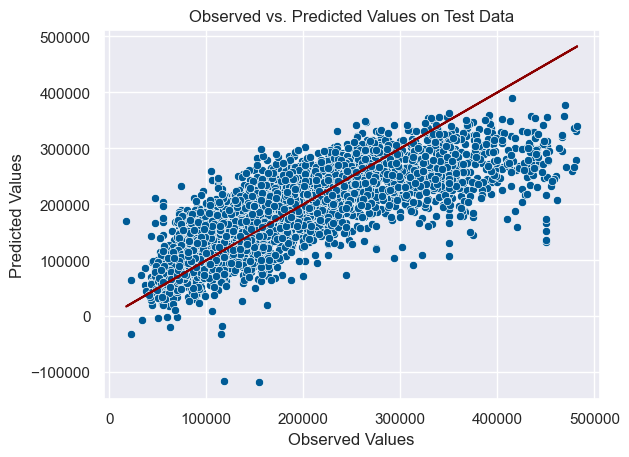

In [339]:
# Scatter plot of observed vs. predicted values on test data
sns.scatterplot(x=y_test, y=prediction, color='#005b96')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs. Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred') # Line plot for perfect prediction (true values)
plt.show()

**Positive Linear Relationship:** The red line and the distribution of data points suggest that as the actual house prices increase, the predicted house prices also increase, which is a positive linear relationship.

#### Assumption 2: Random Sample

In [340]:
# Calculating the mean of the residuals
residuals = model_fitted.resid
mean_residuals = np.mean(residuals)
print('The mean of residuals is {}'.format(np.round(mean_residuals, 2)))

The mean of residuals is -0.0


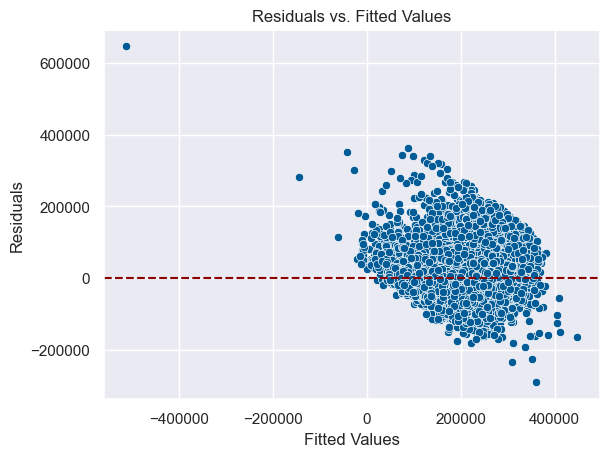

In [341]:
# Plotting the residuals
#plt.scatter(model_fitted.fittedvalues, residuals, color='#005b96')
sns.scatterplot(x=model_fitted.fittedvalues, y=residuals, color='#005b96')
plt.axhline(y=0, color='darkred', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

The residuals are the differences between the observed values and the predicted values from the model. The model is well-fitted since the residuals are randomly scattered around zero (the mean value is 0.00) without any systematic patterns. If a clear shape or trend exist, it could suggest issues such as model misspecification, non-linearity, or omitted variable bias.

#### Assumption 3: Exogeneity

In [342]:
# Checking for correlation between residuals and each predictor
for column in X_train.columns:
    corr_coefficient = np.corrcoef(X_train[column], residuals)[0, 1]
    print(f'Correlation between residuals and {column}: {np.round(corr_coefficient, 2)}')

Correlation between residuals and longitude: -0.0
Correlation between residuals and latitude: 0.0
Correlation between residuals and housing_median_age: 0.0
Correlation between residuals and total_rooms: -0.0
Correlation between residuals and population: -0.0
Correlation between residuals and households: -0.0
Correlation between residuals and median_income: -0.0
Correlation between residuals and ocean_proximity_<1H OCEAN: -0.0
Correlation between residuals and ocean_proximity_INLAND: 0.0
Correlation between residuals and ocean_proximity_NEAR BAY: -0.0
Correlation between residuals and ocean_proximity_NEAR OCEAN: -0.0


Based on the coefficients, all explanatory variables are not correlated with the error term. If endogeneity exists, it will result in biased estimates in an unpredictable way and the conclusion drawn from the results will be incorrect. For a more formal statistical test, use the **Durbin-Wu-Hausman test**. This test involves comparing the model with one that includes an instrumental variable. This checks whether the coefficients of the model change significantly when the potentially endogenous variables are instrumented.

### Assumption 4: Homoskedasticity

The homoskedasticity assumption states that the error term should have a constant variance.

The plot of Residuals vs. Fitted Values show a **random scatter** around the horizontal line at zero, which supports the homoskedasticity assumption.

The residuals also do not display a pattern (such as a curve) nor form a funnel shape where the spread increases with fitted values (heteroskedasticity). It means the variance of the residuals does not change with the level of the independent variables.

### Train/Test/Evaluation with Scikit-learn

#### Scaling the Data

In [343]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Linear Regression

In [344]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** (1/2)

print(f'The error is ${rmse} when predicting the median house prices.')


The error is $59405.88869441674 when predicting the median house prices.


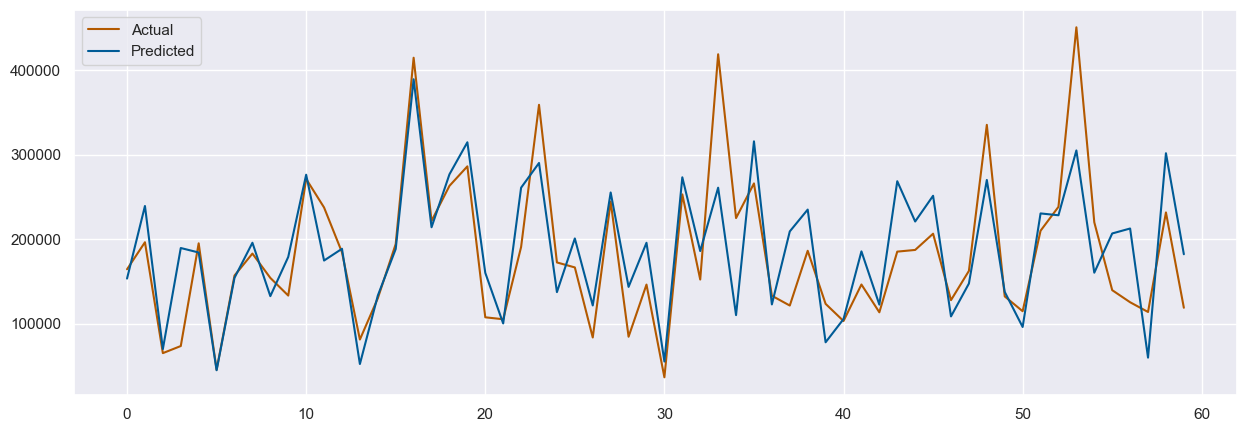

In [345]:
actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
figure = plt.figure(figsize=(15, 5))
actual_vs_predicted = actual_vs_predicted.reset_index().drop(['index'], axis=1)
sns.lineplot(data=actual_vs_predicted[:60], palette={'Actual': '#b35900', 'Predicted': '#005b96'}, dashes=False)
plt.legend(loc='upper left')
plt.show()

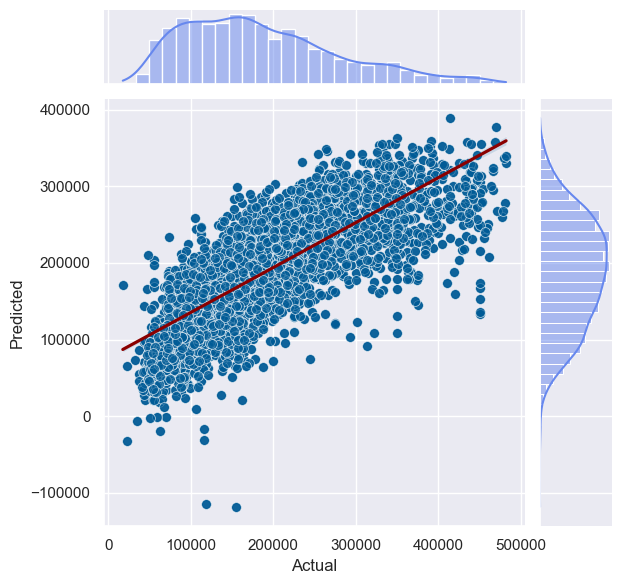

In [346]:
sns.set_palette("coolwarm")
jointplot = sns.jointplot(x='Actual', y='Predicted', data=actual_vs_predicted, kind='reg', joint_kws={'color':'#005b96'})
regline = jointplot.ax_joint.get_lines()[0]
regline.set_color('darkred')
#jointplot.ax_joint.grid(True, linestyle='--', alpha=0.5)
#jointplot.ax_joint.tick_params(axis='both', which='major', labelsize=10)
jointplot.plot_joint(sns.scatterplot, marker='o', color='#005b96', s=50, alpha=0.7)

The linear regression model yielded an RMSE of $59405.89 when predicting median house prices. Although this provides a baseline understanding of the model's performance, there is definitely room for improvement.

Several steps below are recommended to improve the accuracy and robustness of the model:

- Use advanced techniques like below to mitigate errors and potentially improve predictive accuracy
    - Generalized Method of Moments (GMM)
    - Generalized Least Squares (GLS)
    - Feasible Generalized Least Squares (FGLS)
- Use regularization methods to address potential overfitting and enhance model generalization
    - Lasso Regression
    - Ridge Regression
- Refine further the dataset
    - Feature engineering
    - Dimensionality reduction
        - Principal Component Analysis
    - Addressing skewness and distribution
        - Logarithmic or Box-Cox transformations
    - Temporal or spatial analysis
        - Seasonality
        - Trends over time
        - Geographic characteristics
- Explore more flexible ML models
    - Decision trees
    - Random forests
    - Gradient boosting
- Normalize the data